## The theoritical autocovariance function is estimated by the sample autocovariance function.

## **Definition:  The Sample Autocovariance Function** is defined as

$$\hat{\gamma}(h)=n^{-1}\sum_{t=1}^{n-h}(x_{t+h}-\bar{x})(x_t-\bar{x})$$

with $\hat{\gamma}(-h)=\hat{\gamma}(h)$ for $h=0,1,....,n-1$ where $\bar{x}=\frac{1}{n}\sum_{t=1}^{n}x_t$.

Dividing by $n$ nor $n-h$ yeilds an unbiased estimator of $\gamma(h)$.


## **Definition: The Sample Autocorrelation Function** is defined as

$$\hat{\rho}(h)=\frac{\hat{\gamma}(h)}{\hat{\gamma}(0)}$$

Note: The sampling distribution of autocorrelation function can be used to construct CI and to check whether correlations are significant at some lags.

## Example 1.25: Sample ACF and scatterplots

Estimating Autocorrelation is similar to estimating Correlation of pairwise observations $(x_i,y_i)$ for $i=1,2,...,n$. 

For $\rho(h)$ there are $n-h$ pairs given by $(x_t,x_{t+h})$ for $t=1,2,...,n-h$.

The scatter plots below show $\hat{\rho}(1)=0.604$ and $\hat{\rho}(6)=-0.187$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from astsadata import *

/Users/amilamuthunayake/miniforge3/lib/python3.10/site-packages/astsadata/astsadata.py:36: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cmort.index = cmort.index.to_period("W")
/Users/amilamuthunayake/miniforge3/lib/python3.10/site-packages/astsadata/astsadata.py:61: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  gas.index = gas.index.to_period("W")
/Users/amilamuthunayake/miniforge3/lib/python3.10/site-packages/astsadata/astsadata.py:97: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  lap.index = lap.index.to_period("W")
/Users/amilamuthunayake/miniforge3/lib/python3.10/site-packages/astsadata/astsadata.py:109: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  oil.index = oil.index.to_period("W")
/Users/amilamuthunayake/miniforge3/lib/python3.10/site-packages/astsadata/astsadata.py:112: UserWarning: Co

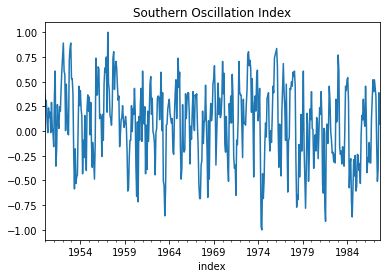

In [24]:
soi.plot(title="Southern Oscillation Index", legend=False)
plt.show()

First 6 sample acf values: [ 0.60410089  0.37379533  0.21412447  0.05013659 -0.10703704 -0.18698742]


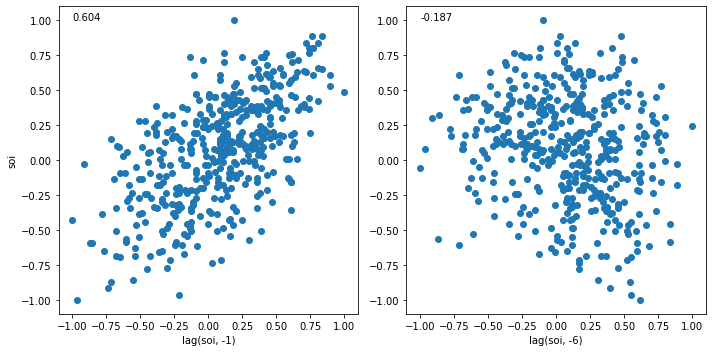

In [10]:
# Example 1.25
# Lags 1 and 6 of soi series
#fft - fourier transform of autocovarince function
r = sm.tsa.acf(soi, nlags=6, fft=False)[1:]
print("First 6 sample acf values:", r)

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
axes[0].scatter(soi.shift(1), soi)
axes[0].set_xlabel("lag(soi, -1)")
axes[0].set_ylabel("soi")
axes[0].text(-1, 1, round(r[0], 3))
axes[1].scatter(soi.shift(6), soi)
axes[1].set_xlabel("lag(soi, -6)")
axes[1].text(-1, 1, round(r[5], 3))
fig.tight_layout()
plt.show()

In [17]:
# manually checking the stationarity of the soi series by considering a few time points

vals = soi.value.values

r0 = sm.tsa.acf(vals, nlags=6, fft=False)[1:]
r1 = sm.tsa.acf(vals[1:], nlags=6, fft=False)[1:]
r2 = sm.tsa.acf(vals[2:], nlags=6, fft=False)[1:]
r3 = sm.tsa.acf(vals[3:], nlags=6, fft=False)[1:]
r50 = sm.tsa.acf(vals[50:], nlags=6, fft=False)[1:]
print(r0)
print(r1)
print(r2)
print(r3)
print(r50)

# It seems sample autocorrelations are consistent across the series.

[ 0.60410089  0.37379533  0.21412447  0.05013659 -0.10703704 -0.18698742]
[ 0.60415848  0.37324785  0.21429757  0.0506362  -0.10787418 -0.18749462]
[ 0.60382675  0.37333885  0.21462731  0.05026675 -0.1080625  -0.18785474]
[ 0.60423017  0.37397386  0.21425347  0.05010704 -0.10854047 -0.1876722 ]
[ 0.59655039  0.36915774  0.20840608  0.03966602 -0.10637365 -0.18432248]


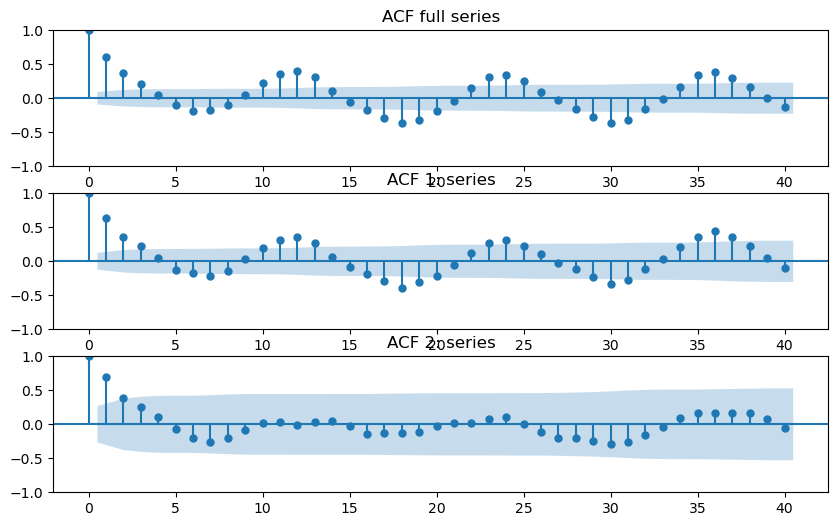

In [18]:
fig, ax = plt.subplots(nrows = 3, figsize=(10,6))

sm.graphics.tsa.plot_acf(vals[0:], lags=40, ax = ax[0], title="ACF full series")
sm.graphics.tsa.plot_acf(vals[200:], lags=40, ax = ax[1], title="ACF 1: series")
sm.graphics.tsa.plot_acf(vals[400:], lags=40, ax = ax[2], title="ACF 2: series")
plt.show()

## To check the stationary (at a few selected points) of the autoregression series with the method used above

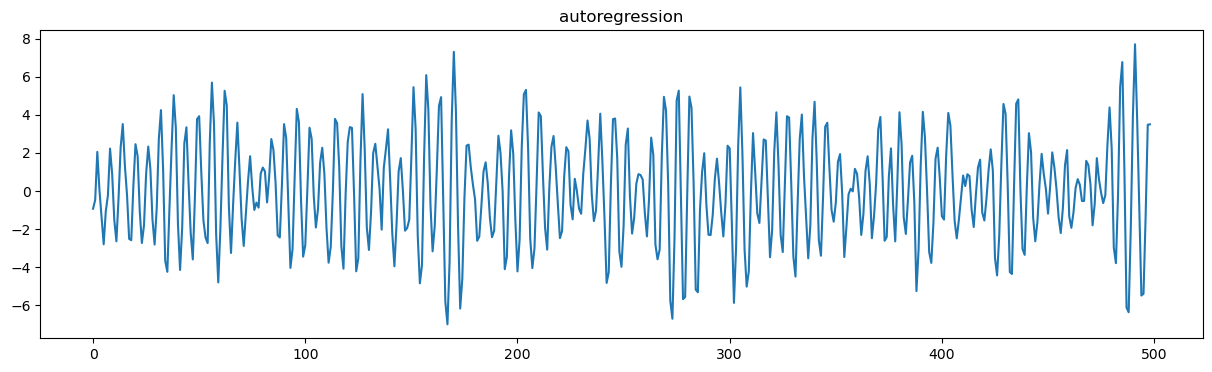

In [14]:
# Example 1.10
w = np.random.normal(loc=0, scale=1, size=550) # 50 extra to avoid startup problems
x = sm.tsa.filters.recursive_filter(w, ar_coeff=np.array([1, -.9]))[51:]

plt.figure(figsize=(15,4))
plt.plot(x)
plt.title("autoregression")
plt.show()

In [15]:
vals = x

r0 = sm.tsa.acf(vals, nlags=16, fft=False)[1:]
r1 = sm.tsa.acf(vals[100:], nlags=16, fft=False)[1:]
r2 = sm.tsa.acf(vals[200:], nlags=16, fft=False)[1:]
r3 = sm.tsa.acf(vals[300:], nlags=16, fft=False)[1:]
r50 = sm.tsa.acf(vals[400:], nlags=16, fft=False)[1:]
print(r0)
print(r1)
print(r2)
print(r3)
print(r50)

## not consistence.. can be seen from sign and even within equal lag values.

[ 0.51553374 -0.39627541 -0.85832215 -0.48306576  0.30280914  0.73290688
  0.44259234 -0.23124011 -0.61732169 -0.37788171  0.19399298  0.52347549
  0.32726832 -0.15411107 -0.43087331 -0.26466241]
[ 0.51910954 -0.38645196 -0.84868133 -0.48878736  0.27753036  0.70469869
  0.44425537 -0.19135024 -0.57597715 -0.37982949  0.14636188  0.47552534
  0.32722071 -0.09914199 -0.36799756 -0.25899205]
[ 0.51159556 -0.39631058 -0.83885107 -0.45354639  0.30755722  0.68807207
  0.38297736 -0.24123332 -0.55284661 -0.28781414  0.22582984  0.45921327
  0.22068439 -0.19241001 -0.35691217 -0.15013039]
[ 0.49885486 -0.41837906 -0.83160525 -0.4135723   0.33145169  0.65684309
  0.31216228 -0.28366919 -0.51246617 -0.20282893  0.25552545  0.39084485
  0.12729334 -0.21690348 -0.29991986 -0.09567394]
[ 0.52625413 -0.36821094 -0.84241341 -0.52303302  0.21442216  0.65258736
  0.44053592 -0.13069333 -0.46776419 -0.31287169  0.092303    0.31867581
  0.19375512 -0.08743666 -0.23120954 -0.11711624]


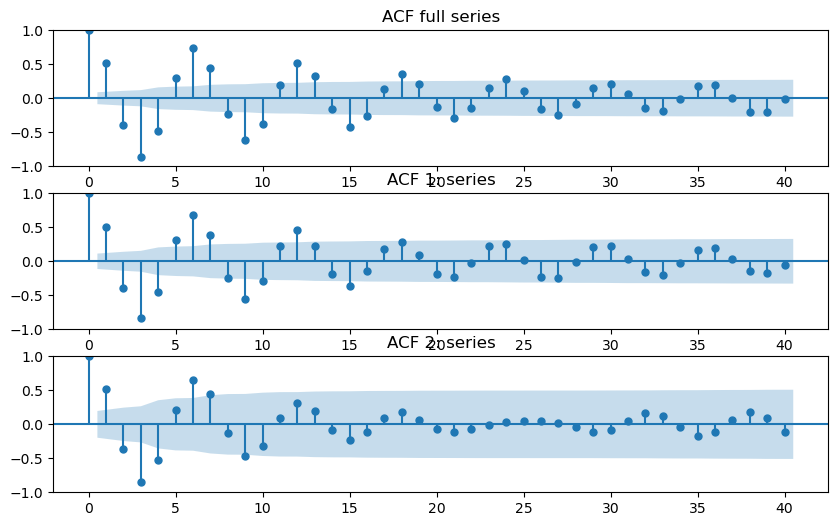

In [16]:
fig, ax = plt.subplots(nrows = 3, figsize=(10,6))

sm.graphics.tsa.plot_acf(vals[0:], lags=40, ax = ax[0], title="ACF full series")
sm.graphics.tsa.plot_acf(vals[200:], lags=40, ax = ax[1], title="ACF 1: series")
sm.graphics.tsa.plot_acf(vals[400:], lags=40, ax = ax[2], title="ACF 2: series")
plt.show()

## Proposition: Large -Sample Distribution of the ACF

If $x_t; t=1,2,..,n$ is white noise, then for $n$ large, the sample ACF, $\hat{\rho}_x(h)\sim \text{approx} N(0,\frac{1}{\sqrt{n}})$ for $h=1,2,...,H$ where $H$ is fixed but arbitrary.

## Illustrative example:

In this example we compare the sample ACF for various sample sizes ($n=10$ and $100$) to the theoritical ACF.

Let $x_t\sim Ber(0.5)$ and $y_t=5+x_t-0.7x_{t-1}$.

$\gamma_y(1)=Cov(y_{t+1},y_t)=Cov(5+x_{t+1}-0.7x_{t}, 5+x_t-0.7x_{t-1})=Cov(-0.7x_t,x_t)=-0.7Cov(x_t,x_t)=-0.7Var(x_t)$

Note that: $Cov(x_t,x_s)=0$ for $t\neq s$.


$\gamma_y(0)=Cov(y_{t},y_t)=Cov(5+x_{t}-0.7x_{t-1}, 5+x_t-0.7x_{t-1})=Cov(x_t,x_t)+Cov(-0.7x_{t-1},-0.7x_{t-1})=(1+0.7^2)Cov(x_t,x_t).$

$\rho_y(1)=\frac{\gamma_y(1)}{\gamma_y(0)}=\frac{-0.7}{1+0.7^2}=-0.47.$

and $\rho_y(h)=0$ for $|h|>1$.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from astsadata import *

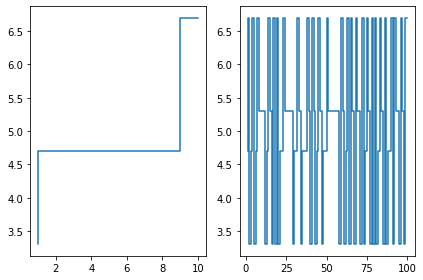

4.760000000000001 5.05
[-0.0006077  -0.0012154  -0.00182309 -0.00243079]
[-0.43069944 -0.13371824  0.11331244  0.06987793]


In [6]:
# Example 1.26
np.random.seed(10101)
# Bernoulli (0, 1) distribution convert (0, 1) to (-1, 1)
x1 = pd.Series(2 * np.random.binomial(n=1, p=.5, size=11) - 1) # simulated sequence of coin tosses
x2 = pd.Series(2 * np.random.binomial(n=1, p=.5, size=101) - 1)
# apply filter and add 5
y1 = 5 + sm.tsa.filters.convolution_filter(x1, filt=[1, -.7], nsides=1).dropna()
y2 = 5 + sm.tsa.filters.convolution_filter(x2, filt=[1, -.7], nsides=1).dropna()

# Plot the new series
fig, axes = plt.subplots(ncols=2)
axes[0].step(y1.index, y1.values)
axes[1].step(y2.index, y2.values)
fig.tight_layout()
plt.show()

# Means of both should be around 5
print(y1.mean(axis=0), y2.mean(axis=0)) # the sample

# Print the first 5 lags of sample autocorrelations of these two series
print(sm.tsa.acf(y1, nlags=4, fft=False)[1:])
print(sm.tsa.acf(y2, nlags=4, fft=False)[1:])

## ACF of a Speech Data

### The original series contains a sequence of repeating short signals. This ACF confirms this behavior, showing repeating peaks at about 106-109 points. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from astsadata import *

/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/core/arrays/datetimes.py

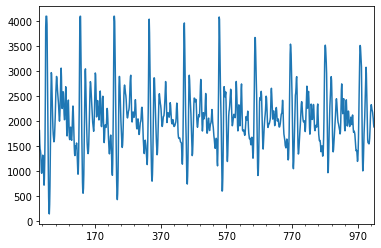

In [3]:
# Example 1.3
speech.plot(legend=False)
plt.show()

[]

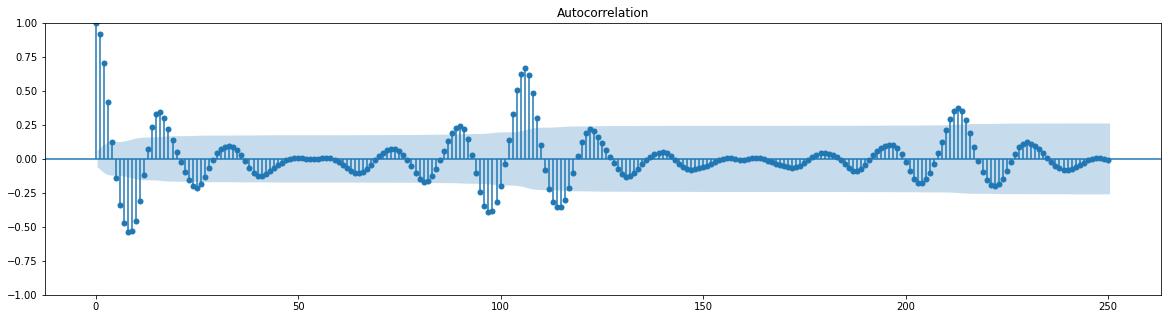

In [14]:
fig, ax = plt.subplots(figsize=(20, 5))
sm.graphics.tsa.plot_acf(speech.value, lags=250, ax = ax)
plt.plot()